In [37]:
import scipy.integrate as integrate
import matplotlib.animation as animation

In [32]:
ve = 10.
re = -1000 

tf = (10 - re) /  ve
t = np.linspace(0, tf, 1000)

ke = .001
k = 1.
d = 1.
yp, ym = d/2., -d/2.

po = [re, 0, yp, ym, ve, 0, 0, 0, 0, 0, 0, 0]

# vector of functions is (xe, ye, yu, yd, vxe, vye, vyu, vyd, axe, aye, ayu, ayd)
# vector of initial conditions is (re, 0, yp, ym, ve, 0, 0, 0, 0, 0, 0, 0)

def Fc(x1, y1, x2, y2):
    r = np.sqrt((x1-x1)**2 + (y1-y2)**2)
    return ke / r**2

def f(p, t):
    '''Returns derivative of vector (xe, ye, yu, yd, vxe, vye, vyu, vyd, axe, aye, ayu, ayd)
    '''
    xe, ye, yu, yd, vxe, vye, vyu, vyd, axe, aye, ayu, ayd = p
    
    def Sphi(z):
        return np.sin(np.arctan( (z-ye)/xe ))
    
    def Cphi(z):
        return np.cos(np.arctan( (z-ye)/xe ))
        
    daxedt = - Fc(xe, ye, 0, yu)*Sphi(yu) - Fc(xe, ye, 0, yd)*Sphi(yd)
    dayedt = - Fc(xe, ye, 0, yu)*Cphi(yu) + Fc(xe, ye, 0, yd)*Cphi(yd)
    
    dayudt = -k*(yu - yp) + Fc(xe, ye, 0, yu)*Sphi(yu)
    dayddt = -k*(yd - ym) + Fc(xe, ye, 0, yd)*Sphi(yd)
    
    dpdt = [vxe, vye, vyu, vyd, axe, aye, ayu, ayd, daxedt, dayedt, dayudt, dayddt]

    return dpdt


In [33]:
sol = integrate.odeint(f, po, t, full_output=1)

In [35]:
for s in range(1000):
    print sol[0][s, :4]
    

[ -1.00000000e+03   0.00000000e+00   5.00000000e-01  -5.00000000e-01]
[ -9.98988989e+02   0.00000000e+00   4.99999999e-01  -4.99999999e-01]
[ -9.97977978e+02   0.00000000e+00   4.99999997e-01  -4.99999997e-01]
[ -9.96966967e+02   0.00000000e+00   4.99999990e-01  -4.99999990e-01]
[ -9.95955956e+02   0.00000000e+00   4.99999977e-01  -4.99999977e-01]
[ -9.94944945e+02   0.00000000e+00   4.99999953e-01  -4.99999953e-01]
[ -9.93933934e+02   0.00000000e+00   4.99999918e-01  -4.99999918e-01]
[ -9.92922923e+02   0.00000000e+00   4.99999872e-01  -4.99999872e-01]
[ -9.91911912e+02   0.00000000e+00   4.99999813e-01  -4.99999813e-01]
[ -9.90900901e+02   0.00000000e+00   4.99999737e-01  -4.99999737e-01]
[ -9.89889890e+02   0.00000000e+00   4.99999641e-01  -4.99999641e-01]
[ -9.88878879e+02   0.00000000e+00   4.99999527e-01  -4.99999527e-01]
[ -9.87867868e+02   0.00000000e+00   4.99999393e-01  -4.99999393e-01]
[ -9.86856857e+02   0.00000000e+00   4.99999235e-01  -4.99999235e-01]
[ -9.85845846e+02   

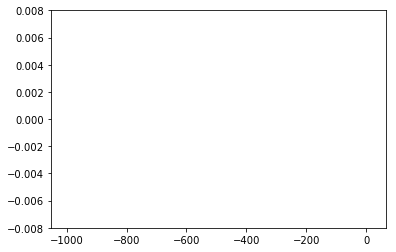

In [46]:
fig1 = plt.figure()

ims = []

for s in range(1000):
    x, y = sol[0][s, :2]
    ims.append((plt.scatter(x, y, s=10), ))

im_ani = animation.ArtistAnimation(fig1, ims, interval=50, repeat_delay=3000, blit=True)

plt.show()